# Times pollution data analysis

In [2]:
import pandas as pd
import numpy as np
from convertbng.util import convert_bng, convert_lonlat

## Initial data exploration

In [3]:
p=pd.read_csv('Times_schools_pollution_data.csv')

In [4]:
p.head()

,urn,local_authority,school,postcode,easting,northing,lsoa,type,phase,no2_avg_2013,above_40_2013,no2_avg_2016,above_40_2016
0,100000,City of London,Sir John Cass's Foundation Primary School,EC3A 5DE,533498,181201,E01032739,Voluntary aided school,Primary,63.1,Yes,57.5,Yes
1,100001,City of London,City of London School for Girls,EC2Y 8BB,532301,181746,E01000002,Other independent school,Not applicable,44.1,Yes,46.0,Yes
2,100002,City of London,St Paul's Cathedral School,EC4M 9AD,532160,181151,E01032739,Other independent school,Not applicable,60.9,Yes,54.8,Yes
3,100003,City of London,City of London School,EC4V 3AL,531981,180844,E01032739,Other independent school,Not applicable,62.7,Yes,57.4,Yes
4,100005,Camden,Thomas Coram Centre,WC1N 2NY,530464,182403,E01000937,Local authority nursery school,Nursery,44.7,Yes,46.0,Yes


In [5]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 13 columns):
urn                3176 non-null int64
local_authority    3176 non-null object
school             3176 non-null object
postcode           3176 non-null object
easting            3176 non-null int64
northing           3176 non-null int64
lsoa               3176 non-null object
type               3176 non-null object
phase              3176 non-null object
no2_avg_2013       3176 non-null float64
above_40_2013      3176 non-null object
no2_avg_2016       3176 non-null float64
above_40_2016      3176 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 322.7+ KB


### Calculate proportion of schools where avg NO2 2016 is above 40

In [6]:
p['above_40_2016'].value_counts(normalize=True)

No     0.754093
Yes    0.245907
Name: above_40_2016, dtype: float64

> 1 in 4 schools above air quality objective for NO2

### What about same calculation by borough?

In [7]:
pAbove=pd.DataFrame(p.groupby('local_authority')['above_40_2016'].value_counts(normalize=True).unstack())

In [8]:
pAbove.sort_values('Yes', ascending=False)

above_40_2016,No,Yes
local_authority,,
City of London,NaN,1.000000
Westminster,0.019802,0.980198
Kensington and Chelsea,0.036145,0.963855
Camden,0.130841,0.869159
Islington,0.197368,0.802632
Tower Hamlets,0.198347,0.801653
Southwark,0.384000,0.616000
Hammersmith and Fulham,0.481928,0.518072
Hackney,0.490909,0.509091


> All of the highest proportions are located in inner/central London boroughs

## Add column for difference between 2013 & 2016 average (2016-2013, + = getting worse)

In [9]:
p['no2_diff']=p['no2_avg_2016']-p['no2_avg_2013']

### Add binary getting worse/better column

In [10]:
p['diff_change']=np.where(p['no2_diff']>0,"worse","better")

### What proportion of school's avg pollution levels are getting better/worse?

In [11]:
p['diff_change'].value_counts(normalize=True)

worse     0.650819
better    0.349181
Name: diff_change, dtype: float64

> 65% of schools have seen worsening NO2 levels between 2013 and 2016

### What about by borough?

In [12]:
pChange=pd.DataFrame(p.groupby('local_authority')['diff_change'].value_counts(normalize=True).unstack())

In [13]:
pChange.sort_values('better', ascending=False)

diff_change,better,worse
local_authority,,
Kensington and Chelsea,0.759036,0.240964
Westminster,0.742574,0.257426
City of London,0.714286,0.285714
Hammersmith and Fulham,0.698795,0.301205
Lambeth,0.657143,0.342857
Wandsworth,0.644068,0.355932
Camden,0.588785,0.411215
Lewisham,0.536082,0.463918
Southwark,0.480000,0.520000


> Even though inner city schools generally have highest NO2 levels, greater proportions of these locations have seen improvements since 2013

> With the exceptions of Tower Hamlets, Hackney & Newham, all quite central boroughs where most schools' pollution has got worse

## Convert BNG coordinates to longitude & latitude using convertbng

> https://pypi.org/project/convertbng/

In [14]:
long_lat = convert_lonlat(p.easting, p.northing)

In [15]:
p['long']=long_lat[0]

In [16]:
p['lat']=long_lat[1]

In [17]:
p.head()

,urn,local_authority,school,postcode,easting,northing,lsoa,type,phase,no2_avg_2013,above_40_2013,no2_avg_2016,above_40_2016,no2_diff,diff_change,long,lat
0,100000,City of London,Sir John Cass's Foundation Primary School,EC3A 5DE,533498,181201,E01032739,Voluntary aided school,Primary,63.1,Yes,57.5,Yes,-5.6,better,-0.077505,51.513970
1,100001,City of London,City of London School for Girls,EC2Y 8BB,532301,181746,E01000002,Other independent school,Not applicable,44.1,Yes,46.0,Yes,1.9,worse,-0.094540,51.519149
2,100002,City of London,St Paul's Cathedral School,EC4M 9AD,532160,181151,E01032739,Other independent school,Not applicable,60.9,Yes,54.8,Yes,-6.1,better,-0.096794,51.513835
3,100003,City of London,City of London School,EC4V 3AL,531981,180844,E01032739,Other independent school,Not applicable,62.7,Yes,57.4,Yes,-5.3,better,-0.099487,51.511118
4,100005,Camden,Thomas Coram Centre,WC1N 2NY,530464,182403,E01000937,Local authority nursery school,Nursery,44.7,Yes,46.0,Yes,1.3,worse,-0.120758,51.525481


### Export data (with long/lat to try in MapBox)

In [18]:
p.to_csv('pollution_data.csv', index=False)

## Aggregate to borough level (average NO2 levels in 2016 & average change)

In [19]:
pAvg=pd.DataFrame(p.groupby('local_authority')['no2_avg_2016'].mean())

In [20]:
pDiff=pd.DataFrame(p.groupby('local_authority')['no2_diff'].mean())

In [21]:
pBorough=pAvg.merge(pDiff, on='local_authority')

### Add proportions by borough as well

In [22]:
pBorough=pBorough.merge(pAbove, on='local_authority')

In [23]:
pBorough=pBorough.merge(pChange, on='local_authority').reset_index()

In [24]:
pBorough=pBorough.fillna(0)

In [25]:
pBorough.sort_values('no2_diff')

,local_authority,no2_avg_2016,no2_diff,No,Yes,better,worse
6,City of London,51.314286,-2.371429,0.000000,1.000000,0.714286,0.285714
19,Kensington and Chelsea,44.303614,-2.203614,0.036145,0.963855,0.759036,0.240964
32,Westminster,47.418812,-2.195050,0.019802,0.980198,0.742574,0.257426
12,Hammersmith and Fulham,41.065060,-1.356627,0.481928,0.518072,0.698795,0.301205
5,Camden,43.956075,-0.914019,0.130841,0.869159,0.588785,0.411215
21,Lambeth,40.574286,-0.899048,0.552381,0.447619,0.657143,0.342857
27,Southwark,41.764000,-0.601600,0.384000,0.616000,0.480000,0.520000
31,Wandsworth,37.911864,-0.476271,0.830508,0.169492,0.644068,0.355932
22,Lewisham,36.380412,-0.327835,0.855670,0.144330,0.536082,0.463918
18,Islington,42.919737,-0.147368,0.197368,0.802632,0.473684,0.526316


### Write borough data to csv

In [26]:
pBorough.to_csv('borough_pollution.csv', index=False)

## Comparing pollution & deprivation 

### Read in LSOA level Index of Multiple Deprivation (IMD) data

> https://data.london.gov.uk/dataset/indices-of-deprivation

In [29]:
imd=pd.read_csv('AdjustedIMD2010scoresfor2011LSOAs.csv')

In [46]:
imd.head()

,LSOA11CD,LSOA11NM,IMD2010_adj,nat_quintile,nat_decile
0,E01000001,City of London 001A,6.16,5,9
1,E01000002,City of London 001B,5.59,5,10
2,E01000003,City of London 001C,13.29,4,7
3,E01000005,City of London 001E,21.36,2,4
4,E01000006,Barking and Dagenham 016A,17.08,3,6


### Aggregate pollution data by LSOA (average NO2 2016 + change in avg NO2)

In [41]:
lsoaAvg=pd.DataFrame(p.groupby('lsoa')['no2_avg_2016'].mean())

In [42]:
lsoaDiff=pd.DataFrame(p.groupby('lsoa')['no2_diff'].mean())

In [44]:
lsoa=lsoaAvg.merge(lsoaDiff, on='lsoa').reset_index()

### Merge pollution data with deprivation data (left join)

In [47]:
lsoaImd=lsoa.merge(imd, how="left", left_on='lsoa', right_on="LSOA11CD")

In [50]:
lsoaImd.head()

,lsoa,no2_avg_2016,no2_diff,LSOA11CD,LSOA11NM,IMD2010_adj,nat_quintile,nat_decile
0,E01000002,46.1,2.2,E01000002,City of London 001B,5.59,5,10
1,E01000005,52.2,-7.2,E01000005,City of London 001E,21.36,2,4
2,E01000010,36.8,-1.1,E01000010,Barking and Dagenham 015C,38.45,1,2
3,E01000013,32.7,0.1,E01000013,Barking and Dagenham 013A,39.80,1,2
4,E01000015,29.6,1.6,E01000015,Barking and Dagenham 009A,38.81,1,2


In [51]:
lsoaImd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2204
Data columns (total 8 columns):
lsoa            2205 non-null object
no2_avg_2016    2205 non-null float64
no2_diff        2205 non-null float64
LSOA11CD        2205 non-null object
LSOA11NM        2205 non-null object
IMD2010_adj     2205 non-null float64
nat_quintile    2205 non-null int64
nat_decile      2205 non-null int64
dtypes: float64(3), int64(2), object(3)
memory usage: 155.0+ KB


### Simple scatter/regression line plots to explore associations

In [67]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set(color_codes=True)

#### Deprivation vs. Average NO2

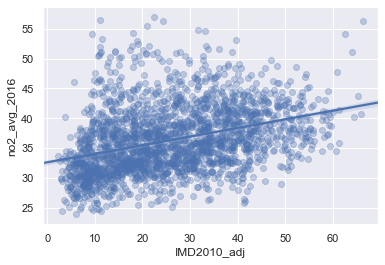

In [70]:
sns.regplot(x='IMD2010_adj', y='no2_avg_2016', data=lsoaImd, scatter_kws={'alpha':0.3})

> Moderate positive association: generally higher average NO2 across schools in LSOAs with greater deprivation

> Requires more analysis and rigorous modelling with controls - e.g. are inner-city LSOAs more deprived, and also have high pollution levels? Control for location?

#### Deprivation vs. Change in NO2 (2013-16)

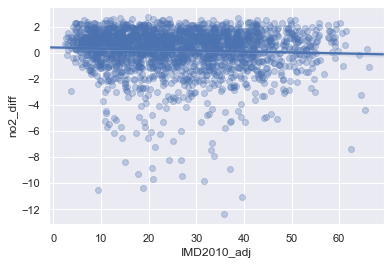

In [72]:
sns.regplot(x='IMD2010_adj', y='no2_diff', data=lsoaImd, scatter_kws={'alpha':0.3})

> No apparent correlation